In [1]:
!pip install pandas

Traceback (most recent call last):
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\Scripts\pip.exe\__main__.py", line 7, in <module>
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\cli\main.py", line 68, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\commands\__init__.py", line 94, in create_command
    module = importlib.import_module(module_path)
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], pac

In [4]:
import pandas as pd

In [3]:
!pip install openpyxl

Traceback (most recent call last):
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\Scripts\pip.exe\__main__.py", line 7, in <module>
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\cli\main.py", line 68, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\commands\__init__.py", line 94, in create_command
    module = importlib.import_module(module_path)
  File "C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], pac

In [5]:
# Load the Excel file (modify 'patient_data.xlsx' to your actual filename if different)
excel_file_path = "Dataset/00Kidney_Patients.xlsx"
patient_df = pd.read_excel(excel_file_path)

In [6]:
patient_df.head()

,Patient_Num,Patient_ID,Age,Gender,Test,Date,Taking_Contrast,Clinical_data,Symptoms,Diagnosing_test,Diagnosing_Right_Kidney,Injure_range_Right_K,Segmentation_Right,Diagnosing_Left_Kidney,Injure_range_Left_K,Segmentation_Left,Stage,Situation,Tumor_Type,Tumor_Class
0,1,KA00001301,33,Male,CT ABDOMEN PELVIS,2021,Yes,Not provided,Flank pain,Soft tissue mass lesion seen in the right adre...,Tissue adrenal,Tissue 2.3 x 1.7 cm adrenal,Undefined,Unremarkable,Unremarkable,Undefined,I,Tumor,Benign,Adenoma
1,2,KA00017864,56,Male,CT ABDOMEN PELVIS,2020,No,Not provided,Flank pain,"Mild bilateral hydronephrosis, kidney stone, l...",Tissue adrenal,Hyperdense lesion 1.5 cm adrenal,"Lower pole, Midportion",Hydronephrosis,"Hydronephrosis 1.6 cm, stone 1.3 cm",Lower calyceal,I,Tumor,Benign,Adenoma
2,3,KA00015810,50,Male,CT ABDOMEN PELVIS,2020,No,Kidney cyst and stone,Not provided,Adenpma adrenal gland,Tissue adrenal,"Adrenal gland , hydronephrosis 2.2cm",Lower calyceal,"Cyst, stone","Cyst 3.3 x 3.8cm, stone",Lower calyceal,I,Tumor,Benign,Adenoma
3,4,KA00017037,53,Male,CT ABDOMEN PELVIS,2021,Yes,Ewing sarcoma,Not provided,Stable bilateral adrenal lesions,"Tissue adrenal, hydronephrosis",Adrenal gland 2 x 1.7 cm,Upper pole,Tissue adrenal,"Adrenal gland 1.6 x 1 cm, cyst 1.3x 1.5 cm",Upper pole,I,Tumor,Benign,Adenoma
4,5,KA00103871,57,Male,CT ABDOMEN PELVIS,2020,No,Not provided,Flank pain,Few nonobstructive stones seen in both kidneys...,"Stone, cyst","Stone 6 mm, cyst, renal scars",Upper calyceal,"Tissue adrenal, stone","Stone, cyst 2.1 x 2.2 cm, Adrenal_g 1.4 x 1.6 cm","Midportion, Upper pole",I,Tumor,Benign,Adenoma


In [6]:
import zipfile
import os

In [7]:
dataset_folder = "Dataset"
unzipped_folder = "unzipped_scans" 

In [8]:
for zip_file in os.listdir(dataset_folder):
    if zip_file.endswith(".zip"):
        patient_id = zip_file.split(".")[0]  # e.g., "01"
        patient_folder = os.path.join(unzipped_folder, patient_id)
        
        # Create a folder for each patient to hold their CT scans
        os.makedirs(patient_folder, exist_ok=True)
        
        # Unzip the file into the patient folder
        with zipfile.ZipFile(os.path.join(dataset_folder, zip_file), 'r') as zip_ref:
            zip_ref.extractall(patient_folder)

In [7]:
import os
import cv2

def load_patient_images(patient_id):
    patient_images = []
    # Define the base directory where the unzipped scans are stored
    base_dir = os.path.join("unzipped_scans", patient_id)
    
    # Iterate through the nested directories to find image files
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # Construct full file path
            file_path = os.path.join(root, file)
            # Check if the file is an image (you can modify the extensions based on your images)
            if file.endswith(('.png', '.jpg', '.jpeg')):
                # Load the image using OpenCV and append it to the list
                image = cv2.imread(file_path)
                if image is not None:
                    patient_images.append(image)

    return patient_images

# Load images for patient 01 and check shape
patient_images = load_patient_images("01")
if patient_images:  # Check if the list is not empty
    print(f"Loaded {len(patient_images)} images for Patient 01 with shape {patient_images[0].shape}")
else:
    print("No images found for Patient 01.")


Loaded 71 images for Patient 01 with shape (512, 512, 3)


In [8]:
# Example to link patient data with images
for index, row in patient_df.iterrows():
    patient_id = str(row['Patient_Num']).zfill(2)  # Assuming 'Patient_ID' column in Excel
    
    # Load images for this patient
    patient_images = load_patient_images(patient_id)
    label = row['Situation']
    print(f"Patient {patient_id} has the situation: {label} and {len(patient_images)} CT images.")



Patient 01 has the situation: Tumor and 71 CT images.
Patient 02 has the situation: Tumor and 70 CT images.
Patient 03 has the situation: Tumor and 70 CT images.
Patient 04 has the situation: Tumor and 70 CT images.
Patient 05 has the situation: Tumor and 70 CT images.
Patient 06 has the situation: Tumor and 70 CT images.
Patient 07 has the situation: Tumor and 70 CT images.
Patient 08 has the situation: Tumor and 70 CT images.
Patient 09 has the situation: Tumor and 70 CT images.
Patient 10 has the situation: Tumor and 70 CT images.
Patient 11 has the situation: Tumor and 70 CT images.
Patient 12 has the situation: Tumor and 70 CT images.
Patient 13 has the situation: Tumor and 70 CT images.
Patient 14 has the situation: Tumor and 70 CT images.
Patient 15 has the situation: Tumor and 70 CT images.
Patient 16 has the situation: Tumor and 70 CT images.
Patient 17 has the situation: Tumor and 70 CT images.
Patient 18 has the situation: Tumor and 70 CT images.
Patient 19 has the situation

In [9]:
import os
import cv2
import pandas as pd
import numpy as np
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
from keras.models import Model

In [11]:
def load_patient_images(patient_id):
    patient_images = []
    # Define the base directory where the unzipped scans are stored
    base_dir = os.path.join("unzipped_scans", patient_id)
    
    # Iterate through the nested directories to find image files
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # Construct full file path
            file_path = os.path.join(root, file)
            # Check if the file is an image
            if file.endswith(('.png', '.jpg', '.jpeg')):
                # Load the image using OpenCV and append it to the list
                image = cv2.imread(file_path)
                if image is not None:
                    patient_images.append(image)

    return patient_images

In [12]:
# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [15]:
import os 
def extract_features(images):
    features = []
    for img in images:
        img = cv2.resize(img, (224, 224))  # Resizing to match ResNet input size
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)  # Preprocess the image
        feature = base_model.predict(img)  # Extract features
        features.append(feature.flatten())  # Flatten the feature array
    return np.array(features)

# Load and process images fo
all_patient_features = {}
patient_ids = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']  # Add more patient IDs as necessary

In [ ]:
# Example to link patient data with images
#*******
#DONT RUN THIS
#********
all_patient_features = {}
for index, row in patient_df.iterrows():
    patient_id = str(row['Patient_Num']).zfill(2)  # Assuming 'Patient_Num' column in Excel
    
    # Load images for this patient
    patient_images = load_patient_images(patient_id)
    label = row['Situation']
    
    # Check if images were loaded
    if len(patient_images) > 0:
        print(f"Patient {patient_id} has the situation: {label} and {len(patient_images)} CT images.")
        
        # Extract features for this patient's images
        features = extract_features(patient_images)
        all_patient_features[patient_id] = features  # Store features in a dictionary
    else:
        print(f"Patient {patient_id} has no CT images.")

Patient 01 has the situation: Tumor and 71 CT images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
for patient_id in patient_ids:
    images = load_patient_images(patient_id)
    patient_features = extract_features(images)
    # Average features for each patient
    all_patient_features[patient_id] = np.mean(patient_features, axis=0)

# Convert to DataFrame for better handling
feature_df = pd.DataFrame.from_dict(all_patient_features, orient='index')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1

Extracted Features for Patient ID: 01
0       0.288594
1       0.383510
2       0.091062
3       0.317889
4       1.191193
          ...   
2043    0.829052
2044    0.131585
2045    0.131839
2046    0.978003
2047    0.462006
Name: 01, Length: 2048, dtype: float32


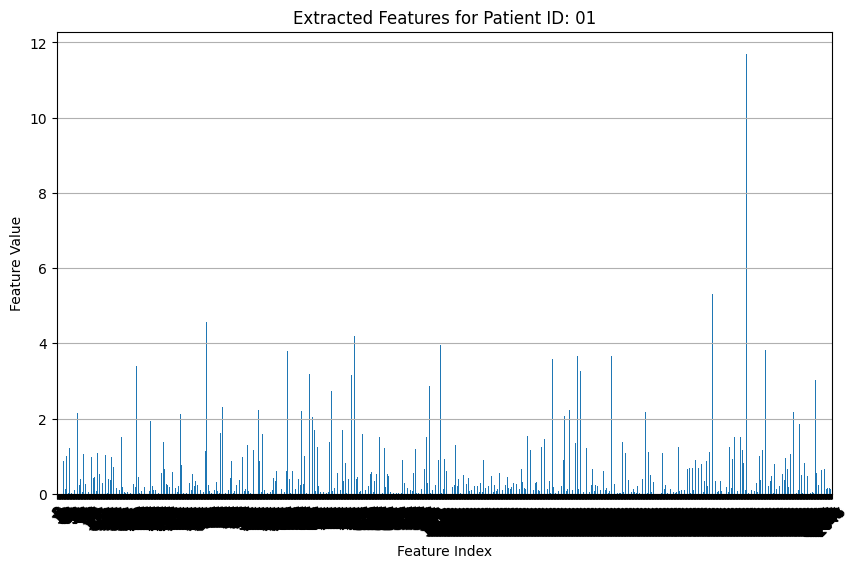

In [18]:
# Choose a specific patient ID to visualize their features
import pandas as pd
import matplotlib.pyplot as plt

specific_patient_id = '01'  # Change this to the patient ID you want to visualize
if specific_patient_id in feature_df.index:
    patient_features = feature_df.loc[specific_patient_id]

    # Print the features
    print(f"Extracted Features for Patient ID: {specific_patient_id}")
    print(patient_features)

    # Visualization
    plt.figure(figsize=(10, 6))
    patient_features.plot(kind='bar')
    plt.title(f'Extracted Features for Patient ID: {specific_patient_id}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print(f"No features found for Patient ID: {specific_patient_id}")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare features and labels
# Assuming `feature_df` contains the features for the first 10 patients
patient_ids = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']  # IDs for the first 10 patients

# Check if patient_ids are in patient_df and extract labels
labels = patient_df[patient_df['Patient_Num'].isin(range(1, 11))]['Situation'].apply(lambda x: 1 if x == 'Tumor' else 0).values

# Print to check labels
print("Extracted Labels:", labels)

# Extract features only for the specified patients
features = feature_df.loc[patient_ids].values  

# Print to check features shape
print("Feature Shape:", features.shape)

# Check if features and labels have the same length
if len(features) != len(labels):
    print(f"Mismatch: Features length {len(features)} vs Labels length {len(labels)}")

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 3: Train a RandomForest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = classifier.predict(X_test)

# Step 5: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Extracted Labels: [1 1 1 1 1 1 1 1 1 1]
Feature Shape: (10, 2048)
Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [21]:
#Step 1: Aggregate Features
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Aggregate features for each patient
aggregated_features = []
labels = []

for patient_id, features in all_patient_features.items():
    # Compute the average of all feature vectors for this patient
    average_features = np.mean(features, axis=0)
    aggregated_features.append(average_features)
    
    # Get the label for the patient from the DataFrame
    label = patient_df.loc[patient_df['Patient_Num'].astype(str).str.zfill(2) == patient_id, 'Situation'].values[0]
    labels.append(label)

# Convert to NumPy arrays
X = np.array(aggregated_features)
y = np.array(labels)


In [22]:
#Step 2: Create Train-Test Split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 88
Testing set size: 23


In [23]:
# Step 3: Train a Classifier
# We'll use a Random Forest classifier as an example. we can try other algorithms or even deep learning models
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [24]:
# Step 4: Evaluate the Model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
# print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.57

Classification Report:
                       precision    recall  f1-score   support

          Normal case       0.67      0.33      0.44         6
Normal case with cyst       1.00      0.17      0.29         6
                Tumor       0.53      0.91      0.67        11

             accuracy                           0.57        23
            macro avg       0.73      0.47      0.47        23
         weighted avg       0.69      0.57      0.51        23



In [25]:
# Step 5: Save the Model for Future Use
# Once the model is trained, save it for reuse without retraining.
import joblib

# Save the trained model
joblib.dump(clf, 'kidney_cancer_detector.pkl')

# Load the model later
# clf = joblib.load('kidney_cancer_detector.pkl')


['kidney_cancer_detector.pkl']

In [ ]:
#run this when you need to load the model
# Load the model later
# clf = joblib.load('kidney_cancer_detector.pkl')

In [26]:
def predict_new_patient(patient_images):
    # Extract features
    features = extract_features(patient_images)
    aggregated_features = np.mean(features, axis=0).reshape(1, -1)  # Reshape for prediction
    
    # Predict
    prediction = clf.predict(aggregated_features)
    probability = clf.predict_proba(aggregated_features)[:, 1]
    
    return prediction[0], probability[0]

# Example usage
new_patient_images = load_patient_images('03')  # Replace '03' with the patient ID
pred_label, pred_prob = predict_new_patient(new_patient_images)
print(f"Predicted Label: {pred_label}, Probability: {pred_prob:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1